# Regression(회귀)

## y = ax + b
## y = theta0 + theta1*x
## 임의의 값 넣어보기 theta0 = 1, theta = 2



In [1]:
class Y_pred():
    def __init__(self, theta_0, theta_1):
        self.theta_0 = theta_0
        self.theta_1 = theta_1

    
def out_y_hat(self, input_x):
    y_hat_row = []
    for i in range(len(input_x)):
        y_hat = self.theta_0 + self.theta_1*input_x[i]
        y_hat_row.append(y_hat)
    
    return y_hat_row

Y_pred.y_hat = out_y_hat

In [2]:
Y_pred_C = Y_pred(theta_0= 1 , theta_1= 2)

In [3]:
x = [1000]
Y_pred_C.y_hat(input_x = x)

[2001]

In [4]:
x = [580, 700, 810, 840]
Y_pred_C = Y_pred(theta_0= 1 , theta_1= 2)
Y_pred_C.y_hat(input_x = x)

[1161, 1401, 1621, 1681]

### Optimization Problem (최적화 문제)
### 목적함수

- 손실함수는 MSE 외에도 다양하게 존재합니다.
- 목적함수 또한 Sum of Square Error(SSE) 외에도 다양하게 존재합니다.
- 결국 손실함수와 목적함수는 서로 비슷한 의미를 내포하고 있습니다.
- 목적함수는 어떤 값을 낮추거나 높이는 목적을 가지는 함수이다

In [5]:
import numpy as np

y_label_total = [374, 385, 375, 401] # 실제값
y_hat_total = [1161, 1401, 1621, 1681] # 임의의 수로 예측한 결과

diff_row = []

for i in range(len(y_hat_total)):
    diff = y_label_total[i] - y_hat_total[i]
    diff_row.append(diff)
    square = np.square(diff_row)
    sse = 1/2 * (np.sum(square))

print("diff = {} \nsquare = {} \nSSE = {}".format(diff, square, sse))

diff = -1280 
square = [ 619369 1032256 1552516 1638400] 
SSE = 2421270.5


## 경사하강법
-  := 는 정의하다라는 기호로 계산한 값으로 갱신한다
-  에타는 Learning Rate로 학습률이다

### 학습률 : 1
### 에폭 : 3
### x : 3

In [6]:
def g(x, eta):
    print("현재 x값 : ", x)
    epoch_1_x = x - eta*((2*x)-2)
    print("첫 번째 에폭 x 값 : {}".format(epoch_1_x))

    epoch_2_x = epoch_1_x - eta*((2*epoch_1_x)-2)
    print("두 번째 에폭 x 값 : {}".format(epoch_2_x))

    epoch_3_x = epoch_2_x - eta*((2*epoch_2_x)-2)
    print("세 번째 에폭 x 값 : {}".format(epoch_3_x))

result = g(x = 3, eta = 1)

현재 x값 :  3
첫 번째 에폭 x 값 : -1
두 번째 에폭 x 값 : 3
세 번째 에폭 x 값 : -1


### 학습률 : 0.01
### 반복갱신횟수 : 10
### x : 3

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def g(learning_rate, epoch_count, random_value_bool = False, x = 3):
    if random_value_bool:
        x = np.random.normal(0, 1, 1)

    print("Now 'x' Value : ", x)
    print("Now Learning Rate Value : ", learning_rate)

    x_row = []

    for i in range(epoch_count):
        x = x - learning_rate*((2*x)-2)
        print("Epoch {} - x {}".format(i+1, round(x,3)))
        x_row.append(x)

    return x_row

In [8]:
result = g(learning_rate=0.1, epoch_count=10, random_value_bool=False, x=3)

Now 'x' Value :  3
Now Learning Rate Value :  0.1
Epoch 1 - x 2.6
Epoch 2 - x 2.28
Epoch 3 - x 2.024
Epoch 4 - x 1.819
Epoch 5 - x 1.655
Epoch 6 - x 1.524
Epoch 7 - x 1.419
Epoch 8 - x 1.336
Epoch 9 - x 1.268
Epoch 10 - x 1.215


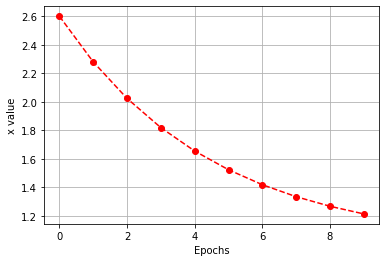

In [9]:
plt.plot(result, '--o', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('x value')
plt.grid()
plt.show()

## 2021.07.06

In [23]:
import numpy as np

In [24]:
x = np.asarray([580, 700, 810, 840])
y_label_total = np.asarray([374, 385, 375, 401])

In [25]:
input_cnt = 1
output_cnt = 1
RND_MEAN = 0
RND_STD = 1

In [26]:
def main_execute(x, y, epoch_count, report, lr = 0.001):
    model_init()
    sse_row, theta_0_row, theta_1_row = run_train(x, y, epoch_count, report, lr)

    return sse_row, theta_0_row, theta_1_row

# theta 초기화
def model_init():
    global theta_0, theta_1
    theta_1 = np.random.normal(RND_MEAN,RND_STD,[input_cnt, output_cnt])
    theta_0 = np.random.normal(RND_MEAN,RND_STD,[output_cnt])

In [27]:
# y_hat 구하는 함수
def forward_neuralnet(input_x):
    y_hat = theta_0 + theta_1 * input_x 
    return y_hat

In [28]:
# 손실함수 SSE를 사용해서 후처리 하는 함수
def forward_postproc(output, y):
    diff = output - y
    square = np.square(diff)
    sse = 1/2 *(np.sum(square))

    return sse

In [29]:
# theta_0, theta_1 업데이트
def back_propagation(y_hat, lr):
    global theta_0, theta_1
    theta_0 = theta_0 - lr * (np.sum(y_hat - y_label_total))
    theta_1 = theta_1 - lr * (np.sum(y_hat - y_label_total) * x)

In [42]:
def run_train(x, y, epoch_count, report, lr):
    print("Initial theta_0 : {}".format(theta_0))
    print("Initial theta_1 : {}".format(theta_1))

    sse_row = []
    theta_0_row = []
    theta_1_row = []
    for epoch in range(epoch_count):
        y_hat = forward_neuralnet(x)
        sse = forward_postproc(y_hat, y)

        sse_row.append(sse)
        back_propagation(y_hat, lr)

        theta_0_row.append(theta_0)
        theta_1_row.append(theta_1)

        if (report > 0) and (epoch % report == 0):
            print("Epoch - {}".format(epoch+1))
            print("SSE - {}".format(sse))

    print("="*50)
    print("Final SSE : {}".format(sse))

    return sse_row, theta_0_row, theta_1_row

sse_row, theta_0_row, theta_1_row = main_execute(x, y_label_total, epoch_count = 30, report = 4, lr=0.1)

Initial theta_0 : [0.24200024]
Initial theta_1 : [[0.59735465]]
Epoch - 1
SSE - 11983.7249142584
Epoch - 5
SSE - 3.2877381732179655e+46
Epoch - 9
SSE - 1.727527725440838e+89
Epoch - 13
SSE - 9.077219306809266e+131
Epoch - 17
SSE - 4.769585409859903e+174
Epoch - 21
SSE - 2.50615791169476e+217
Epoch - 25
SSE - 1.3168497759503856e+260
Epoch - 29
SSE - 6.919329880725355e+302
Final SSE : inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


In [43]:
import matplotlib.pyplot as plt

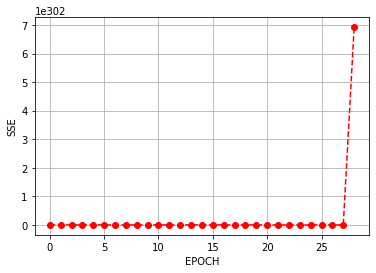

In [44]:
plt.plot(sse_row, '--o', color='red')
plt.xlabel('EPOCH')
plt.ylabel('SSE')
plt.grid()
plt.show()